In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Regressão linear múltipla

In [2]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [3]:
# Carregamento da base de dados e exclusão da primeiro coluna
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [4]:
#mpeg consumo, cyl clindros, disp cilindradas, hp
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
#exclui coluna
base = base.drop(['Unnamed: 0'], axis = 1)

In [6]:
# Criação de X e Y: variável independente e variável dependente
# Cálculo da correlação entre X e Y
X = base.iloc[:, 2].values #coluna disp
y = base.iloc[:, 0].values #coluna mpg
correlacao = np.corrcoef(X, y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [7]:
# Mudança do formato de X para o formato de matriz (necessário para versões mais recentes do sklearn)
X = X.reshape(-1, 1)

In [8]:
# Criação do modelo, treinamento, visualização dos coeficientes e do score do modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [9]:
#Interceptação
modelo.intercept_

29.59985475616395

In [10]:
#inclinação
modelo.coef_

array([-0.04121512])

In [11]:
#score R^2
modelo.score(X, y)

0.7183433404897299

In [12]:
# Geração das previsões
previsoes = modelo.predict(X)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [13]:
# Criação do modelo, utilizando a biblioteca statsmodel 
#podemos ver r ajustadodo r2
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data = base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           9.38e-10
Time:                        09:51:46   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

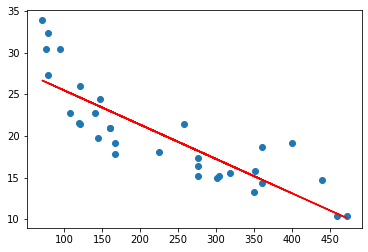

In [14]:
# Visualização dos resultados
plt.scatter(X, y)
plt.plot(X, previsoes, color = 'red')

In [15]:
# Previsão para somente um valor
modelo.predict([[200]])

array([21.35683076])

In [16]:
# Criação de novas variáveis X1 e Y1 e novo modelo para comparação com o anterior
# 3 variáveis dependentes para prever mpg: cyl	disp	hp
X1 = base.iloc[:, 1:4].values
X1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [17]:
y1 = base.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(X1, y1)
#R^2
modelo2.score(X1, y1)

0.7678877440928638

In [18]:
# Criação do modelo ajustado com mais atributos (regressão linear múltipla)
#usando stats models
modelo_ajustado2 = sm.ols(formula = 'mpg ~ cyl + disp + hp', data = base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           5.05e-09
Time:                        09:51:46   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Previsão de um novo registro
novo = np.array([4, 200, 100])
novo = novo.reshape(1, -1)
modelo2.predict(novo)

array([24.03968887])

In [ ]:
modelo_treinado2.predict(novo)